In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive 

## IPRs

### vogel's IPR for saturated reservoir

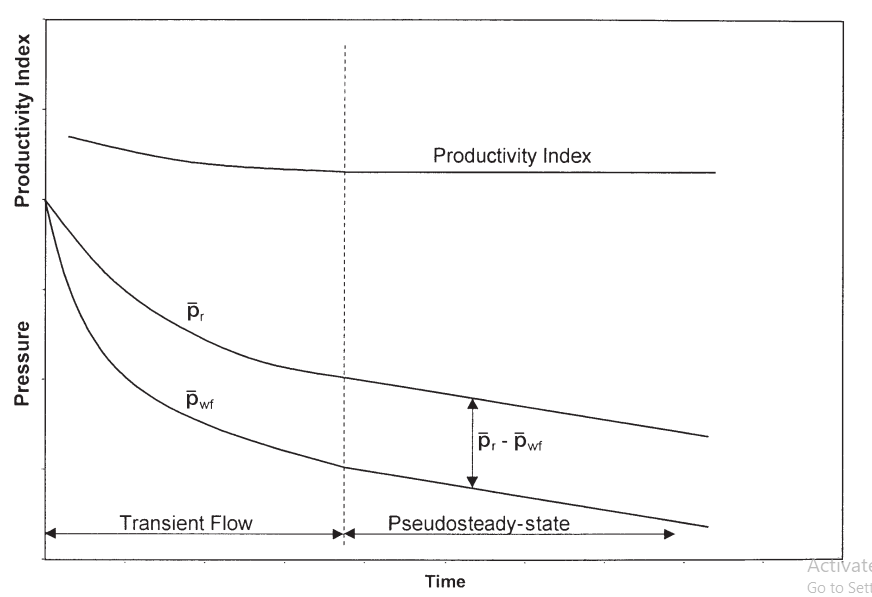
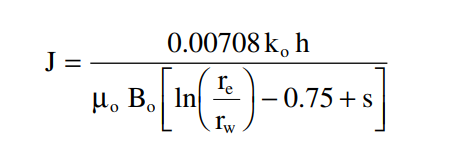

In [4]:
poro = float(input("Enter porosity: "))
ko = float(input("Enter perm(mD): "))
h = float(input("Enter pay zone thikckness(ft): "))
muo = float(input("Enter the viscosity(cp): "))
Bo = float(input("Enter the fomration volume factor: "))
s = float(input("Enter the skin factor: "))
pr = float(input("Enter the reservoir pressure(psi): "))
pb = float(input("Enter the bubble point pressure(psi): "))
ct = float(input("Enter the commpressiblity factor (psi^-1): "))
A = float(input("Enter Drainage area(acres): "))
re = np.sqrt(43560*A/np.pi)
rw = float(input("Enter the wellbore radius(ft): "))


Enter porosity: 0.2
Enter perm(mD): 8.2
Enter pay zone thikckness(ft): 55
Enter the viscosity(cp): 1.7
Enter the fomration volume factor: 1.1
Enter the skin factor: 0
Enter the reservoir pressure(psi): 5651
Enter the bubble point pressure(psi): 5651
Enter the commpressiblity factor (psi^-1): .0000129
Enter Drainage area(acres): 640
Enter the wellbore radius(ft): 0.328


In [6]:
J = (0.00708*ko*h)/(muo*Bo*(np.log(re/rw)-0.75+s))
print(f"Productivity index is {J}")

Productivity index is 0.20415083090728783


In [9]:
qmax = J*pr/1.8
print(f"The maximum production is {qmax}")

The maximum production is 640.920191920602


In [12]:
a = np.arange(0, pr, 500)
a

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500.])

In [14]:
b = np.append(a, pr)
b

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500., 5651.])

In [15]:
pwf = b[::-1]

In [16]:
pwf

array([5651., 5500., 5000., 4500., 4000., 3500., 3000., 2500., 2000.,
       1500., 1000.,  500.,    0.])

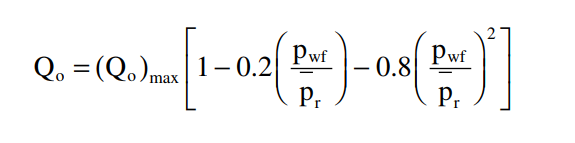

In [21]:
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/pr)-0.8*((i/pr)**2))
    flowrate.append(q)

In [22]:
flowrate

[0.0,
 30.460677581039775,
 126.09754857302923,
 213.70630926370362,
 293.28695965306315,
 364.8394997411077,
 428.3639295278374,
 483.86024901325214,
 531.3284581973519,
 570.7685570801368,
 602.1805456616067,
 625.5644239417618,
 640.920191920602]

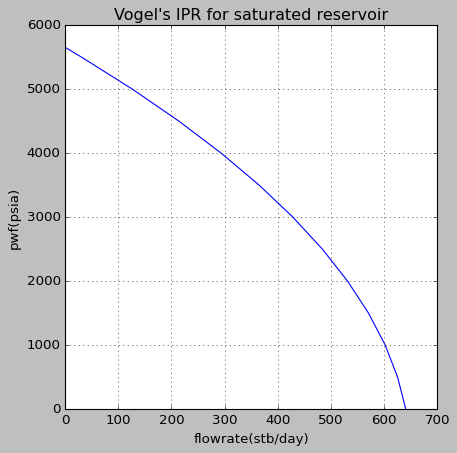

In [28]:
plt.figure(figsize = (6, 6))
plt.plot(flowrate, pwf)
plt.xlabel("flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("Vogel's IPR for saturated reservoir")
plt.grid()
plt.style.use("fivethirtyeight")

In [29]:
def vogel():
    poro = float(input("Enter porosity: "))
    ko = float(input("Enter perm(mD): "))
    h = float(input("Enter pay zone thikckness(ft): "))
    muo = float(input("Enter the viscosity(cp): "))
    Bo = float(input("Enter the fomration volume factor: "))
    s = float(input("Enter the skin factor: "))
    pr = float(input("Enter the reservoir pressure(psi): "))
    pb = float(input("Enter the bubble point pressure(psi): "))
    ct = float(input("Enter the commpressiblity factor (psi^-1): "))
    A = float(input("Enter Drainage area(acres): "))
    re = np.sqrt(43560*A/np.pi)
    rw = float(input("Enter the wellbore radius(ft): "))
    J = (0.00708*ko*h)/(muo*Bo*(np.log(re/rw)-0.75+s))
    print(f"Productivity index is {J}")
    qmax = J*pr/1.8
    print(f"The maximum production is {qmax}")
    a = np.arange(0, pr, 500)
    b = np.append(a, pr)
    pwf = b[::-1]
    flowrate = []
    for i in pwf:
        q = qmax*(1-0.2*(i/pr)-0.8*((i/pr)**2))
        flowrate.append(q)
    plt.figure(figsize = (6, 6))
    plt.plot(flowrate, pwf)
    plt.xlabel("flowrate(stb/day)")
    plt.ylabel("pwf(psia)")
    plt.title("Vogel's IPR for saturated reservoir")
    plt.grid()
    plt.style.use("fivethirtyeight")

Enter porosity: 0.2
Enter perm(mD): 9
Enter pay zone thikckness(ft): 60
Enter the viscosity(cp): 1.8
Enter the fomration volume factor: 1.101
Enter the skin factor: 0
Enter the reservoir pressure(psi): 5650
Enter the bubble point pressure(psi): 5650
Enter the commpressiblity factor (psi^-1): 0.000013
Enter Drainage area(acres): 640
Enter the wellbore radius(ft): 0.3
Productivity index is 0.2282135697730783
The maximum production is 716.3370384543847


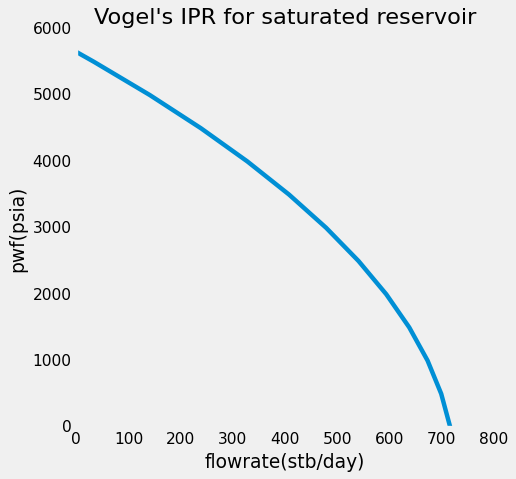

In [31]:
vogel()

## Comparison between vogel and fetkovich IPR

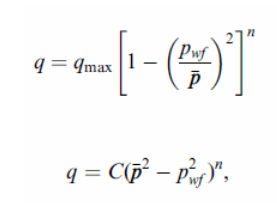

In [32]:
Pr = float(input("Enter the reservoir pressure(psia): "))
Pwf1 = float(input("Enter the first testing pressure (psia): "))
Q1 = float(input("Enter the tested flowarate at first testing pressure(stb/day): "))
Pwf2 = float(input("Enter the second testing pressure (psia): "))
Q2 = float(input("Enter the tested flowarate at second testing pressure(stb/day): "))

Enter the reservoir pressure(psia): 3000
Enter the first testing pressure (psia): 2000
Enter the tested flowarate at first testing pressure(stb/day): 500
Enter the second testing pressure (psia): 1000
Enter the tested flowarate at second testing pressure(stb/day): 800


In [34]:
# vogel's calculation 
qmax_v = float(Q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))
qmax_v

978.2608695652175

In [42]:
pressure = np.arange(0, Pr+500, 500)

flowrate_vogel = []

for i in pressure:
    Qv = qmax_v*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(Qv)
flowrates_vogel = np.array(flowrate_vogel)

In [43]:
flowrates_vogel

array([978.26086957, 923.91304348, 826.08695652, 684.7826087 ,
       500.        , 271.73913043,   0.        ])

In [44]:
# fetkovitch 

n = np.log10(Q1/Q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
c = Q1/((Pr**2-Pwf1**2)**n)

In [45]:
c

0.0001

In [47]:
flowrate_fetkovich = []
for j in pressure:
    Qf = float(c*((Pr**2)-(j**2))**n)
    flowrate_fetkovich.append(Qf)
flowrates_fetkovich = np.array(flowrate_fetkovich)

In [48]:
flowrates_fetkovich

array([900., 875., 800., 675., 500., 275.,   0.])

In [49]:
df = pd.DataFrame()
df["Pressures"] = pressure
df["flowrate_vogel"] = flowrates_vogel
df["flowrate_fetkovich"] = flowrates_fetkovich

In [50]:
df

,Pressures,flowrate_vogel,flowrate_fetkovich
0,0.0,978.260870,900.0
1,500.0,923.913043,875.0
2,1000.0,826.086957,800.0
3,1500.0,684.782609,675.0
4,2000.0,500.000000,500.0
5,2500.0,271.739130,275.0
6,3000.0,0.000000,0.0


Text(0.5, 1.0, "Comparison between Vogel's and Fetkovich's model on IPR")

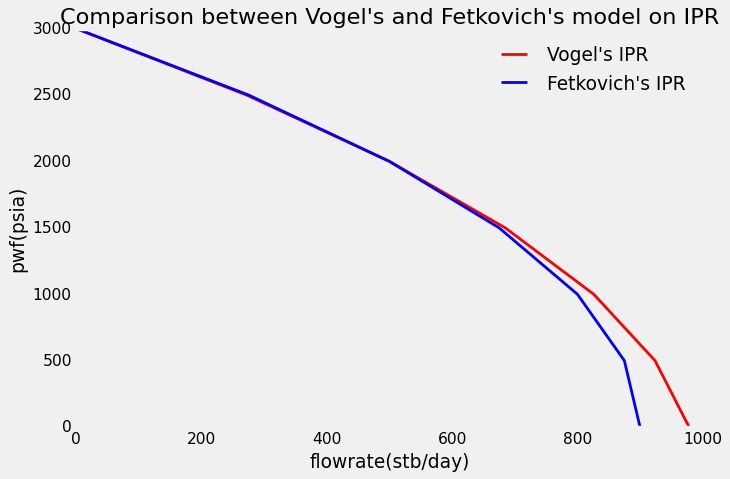

In [52]:
plt.figure(figsize = (9, 6))
plt.plot(flowrate_vogel, pressure, c = "red", linewidth = 2.5, label = "Vogel's IPR" )
plt.plot(flowrate_fetkovich, pressure, c = "blue", linewidth = 2.5, label = "Fetkovich's IPR" )
plt.xlabel("flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid()
plt.legend()
plt.title("Comparison between Vogel's and Fetkovich's model on IPR")

In [73]:
def comparison_vogel_fetkovich():
    Pr = float(input("Enter the reservoir pressure(psia): "))
    Pwf1 = float(input("Enter the first testing pressure (psia): "))
    Q1 = float(input("Enter the tested flowarate at first testing pressure(stb/day): "))
    Pwf2 = float(input("Enter the second testing pressure (psia): "))
    Q2 = float(input("Enter the tested flowarate at second testing pressure(stb/day): "))
    ## Vogel's calculations
    qmax_v = float(Q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))
    pressure = np.arange(0, Pr+500, 500)

    flowrate_vogel = []

    for i in pressure:
        Qv = qmax_v*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(Qv)
    flowrates_vogel = np.array(flowrate_vogel)
    
    ## Fetkovich calculation
    n = np.log10(Q1/Q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
    c = Q1/((Pr**2-Pwf1**2)**n)
    
    
    flowrate_fetkovich = []
    for j in pressure:
        Qf = float(c*((Pr**2)-(j**2))**n)
        flowrate_fetkovich.append(Qf)
    flowrates_fetkovich = np.array(flowrate_fetkovich)
    
    # creating dataframe
    df = pd.DataFrame()
    df["Pressures"] = pressure
    df["flowrate_vogel"] = flowrates_vogel
    df["flowrate_fetkovich"] = flowrates_fetkovich
    plt.figure(figsize = (9, 6))
    plt.plot(flowrates_vogel, pressure, c = "red", linewidth = 2.5, label = "Vogel's IPR" )
    plt.plot(flowrates_fetkovich, pressure, c = "blue", linewidth = 2.5, label = "Fetkovich's IPR" )
    plt.xlabel("flowrate(stb/day)")
    plt.ylabel("pwf(psia)")
    plt.grid()
    plt.legend()
    plt.title("Comparison between Vogel's and Fetkovich's model on IPR")
    print(df)
                                   

In [75]:
#other code

def comparison_vogel_fetko():
    Pr = float(input("Enter the Reservoir Pressure(psia): "))
    Pwf1 = float(input("Enter the first testing pressure(psia): "))
    q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
    Pwf2 = float(input("Enter the second testing pressure(psia): "))
    q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))
    ##Vogel Calculations-
    qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))
    Pressures = np.arange(0,3500,500)
    flowrate_vogel = []
    for i in Pressures:
        q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
        flowrate_vogel.append(q)
    flowrates_vogel = np.array(flowrate_vogel)
    ##Fetkovich calculation_
    n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
    C = q1/((Pr**2-Pwf1**2)**n)
    flowrate_Fetkovich = []
    for j in Pressures:
        Q = float(C*((Pr**2-j**2)**n))
        flowrate_Fetkovich.append(Q)
    flowrates_Fetkovich =np.array(flowrate_Fetkovich)
    ##Dataframe and Plotting
    flowrates_Fetkovich = pd.Series(flowrate_Fetkovich)
    flowrates_vogel = pd.Series(flowrate_vogel)
    Pressure = pd.Series(Pressures)
    df = pd.DataFrame()
    df["Pressures"] = Pressure
    df["flowrates_vogel"] =flowrates_vogel
    df["flowrates_Fetkovich"] = flowrates_Fetkovich
    flowrate = df[["flowrates_vogel","flowrates_Fetkovich"]]
    plt.figure(figsize = (9,6))
    plt.style.use('fivethirtyeight')
    plt.plot(flowrates_vogel,Pressures, c = "red",linewidth=3)
    plt.plot(flowrates_Fetkovich,Pressures,c= "blue" ,alpha = 0.7,linewidth=3)
    plt.xlabel("Flowrate(stb/day)")
    plt.ylabel("pwf(psia)")
    plt.grid(True)
    plt.legend(flowrate, loc = "best")
    plt.title("Comparison between Vogel's and Fetkovich's Model for IPR")
    print(df)

Enter the Reservoir Pressure(psia): 300
Enter the first testing pressure(psia): 200
Enter the tested flowrate at first testing pressure(stb/day): 50
Enter the second testing pressure(psia): 100
Enter the tested flowrate at second testing pressure(stb/day): 8


C:\Users\Dell\AppData\Local\Temp/ipykernel_20148/3403556429.py:20: RuntimeWarning: invalid value encountered in double_scalars
  Q = float(C*((Pr**2-j**2)**n))


   Pressures  flowrates_vogel  flowrates_Fetkovich
0          0        97.826087             5.054082
1        500      -152.173913                  NaN
2       1000      -836.956522                  NaN
3       1500     -1956.521739                  NaN
4       2000     -3510.869565                  NaN
5       2500     -5500.000000                  NaN
6       3000     -7923.913043                  NaN


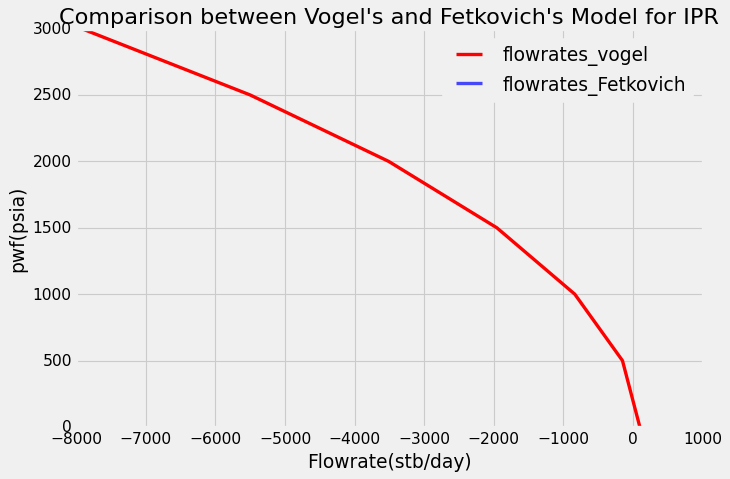

In [77]:
comparison_vogel_fetko()